In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
x_temp = np.arange(0, 50, 0.5)
x_hum = np.arange(0, 100, 1)
x_speed  = np.arange(0, 100, 1)

In [3]:
temp = ctrl.Antecedent(x_temp , 'temp')
hum = ctrl.Antecedent(x_hum , 'hum')
speed = ctrl.Consequent(x_speed, 'speed')

C:\Users\abdalrhman\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


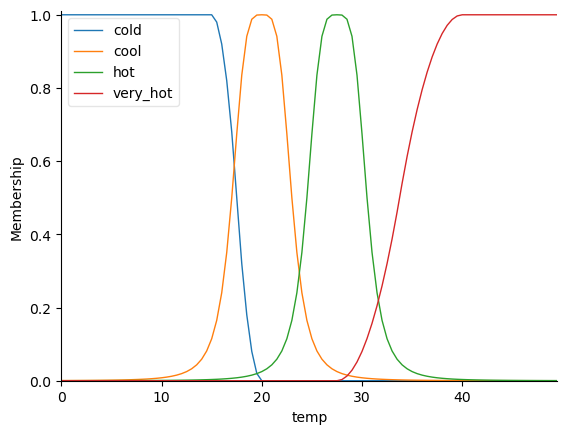

In [4]:
temp['cold'] =fuzz.zmf(x_temp , 15 , 20)
temp['cool'] =fuzz. 
temp['hot'] =fuzz.gbellmf(x_temp ,3 , 2 , 27.5)
temp['very_hot'] =fuzz.smf(x_temp , 27.5 , 40)

temp.view()
# plt.plot(x_temp , temp['cold'], label = 'cold')
# plt.plot(x_temp , temp['cool'] , label = 'cool')
# plt.plot(x_temp , temp['hot'], label = 'hot')
# plt.plot(x_temp , temp['very_hot'], label = 'very_hot')
# plt.legend()
# plt.show()

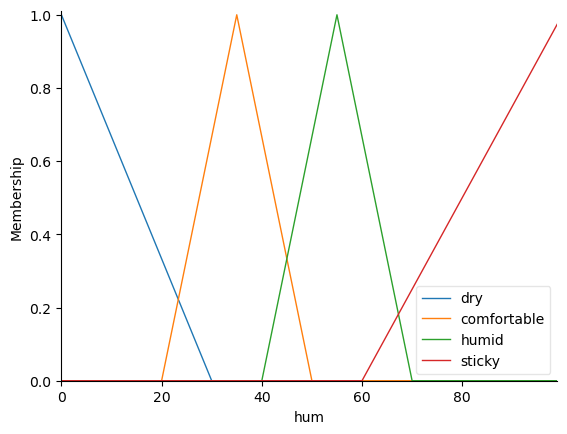

In [5]:
hum['dry'] =fuzz.trimf(x_hum , [0 , 0 , 30])
hum['comfortable'] =fuzz.trimf(x_hum , [20 , 35 , 50])
hum['humid'] =fuzz.trimf(x_hum , [40 , 55 , 70])
hum['sticky'] =fuzz.trimf(x_hum , [60 , 100 , 100])

hum.view()
# plt.plot(x_hum , dry , label = 'dry')
# plt.plot(x_hum , comfortable , label = 'comfortable')
# plt.plot(x_hum , humid , label = 'humid')
# plt.plot(x_hum , sticky , label = 'sticky')
# plt.legend()

# plt.show()

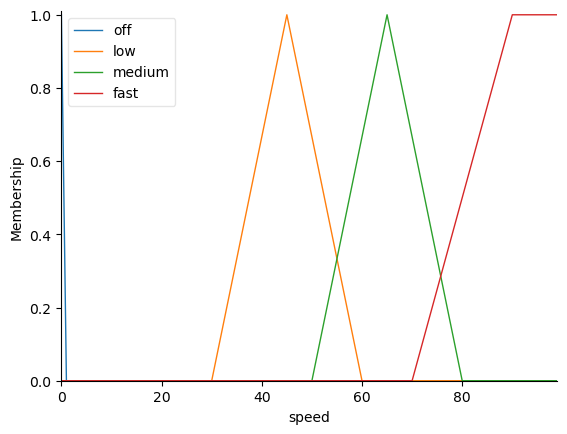

In [6]:
speed['off'] =fuzz.trimf(x_speed , [0 , 0 , 0])
speed['low'] =fuzz.trimf(x_speed , [30 , 45 , 60])
speed['medium'] =fuzz.trimf(x_speed , [50 , 65 , 80])
speed['fast'] =fuzz.trapmf(x_speed , [70 , 90 , 150 , 150])

speed.view()
# plt.plot(x_hum , off , label = 'off')
# plt.plot(x_hum , low , label = 'low')
# plt.plot(x_hum , medium , label = 'medium')
# plt.plot(x_hum , fast , label = 'fast')
# plt.legend()

# plt.show()

In [7]:
rule1 = ctrl.Rule(temp['cold'] & hum['dry'] , speed['off'])
rule2 = ctrl.Rule(temp['cold'] & hum['comfortable'],  speed['off'])
rule3 = ctrl.Rule(temp['cold'] & hum['humid'],  speed['off'])
rule4 = ctrl.Rule(temp['cold'] & hum['sticky'],  speed['low'])
rule5 = ctrl.Rule(temp['cool'] & hum['dry'],  speed['off'])
rule6 = ctrl.Rule(temp['cool'] & hum['comfortable'],  speed['off'])
rule7 = ctrl.Rule(temp['cool'] & hum['humid'], speed['low'])
rule8 = ctrl.Rule(temp['cool'] & hum['sticky'], speed['medium'])
rule9 = ctrl.Rule(temp['hot'] & hum['dry'], speed['low'])
rule10 = ctrl.Rule(temp['hot'] & hum['comfortable'], speed['medium'])
rule11 = ctrl.Rule(temp['hot'] & hum['humid'], speed['fast'])
rule12 = ctrl.Rule(temp['hot'] & hum['sticky'], speed['fast'])
rule13 = ctrl.Rule(temp['very_hot'] & hum['dry'], speed['medium'])
rule14 = ctrl.Rule(temp['very_hot'] & hum['comfortable'], speed['fast'])
rule15 = ctrl.Rule(temp['very_hot'] & hum['humid'], speed['fast'])
rule16 = ctrl.Rule(temp['very_hot'] & hum['sticky'], speed['fast'])



In [8]:
fuzzy_ctrl = ctrl.ControlSystem([rule1 , rule2 , rule3 , rule4 ,
                                 rule5 , rule6 , rule7 , rule8 ,
                                 rule9 , rule10 , rule11 ,rule12 ,
                                 rule13 , rule14 , rule15 ,rule16])
output_speed = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [9]:
temp_input = 40 
hum_input = 65  

output_speed.input['temp'] = temp_input
output_speed.input['hum'] = hum_input

output_speed.compute()

OrderedDict([('speed', 86.00887993728321)])


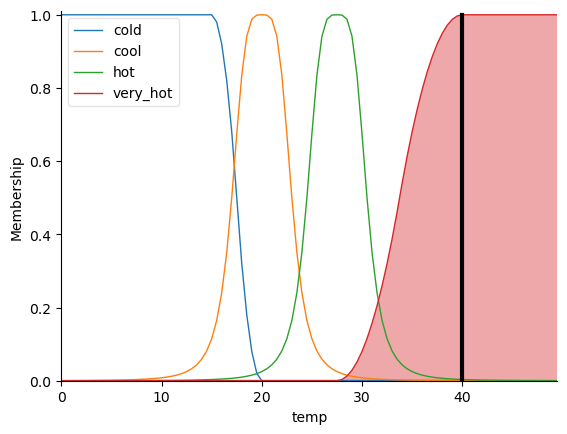

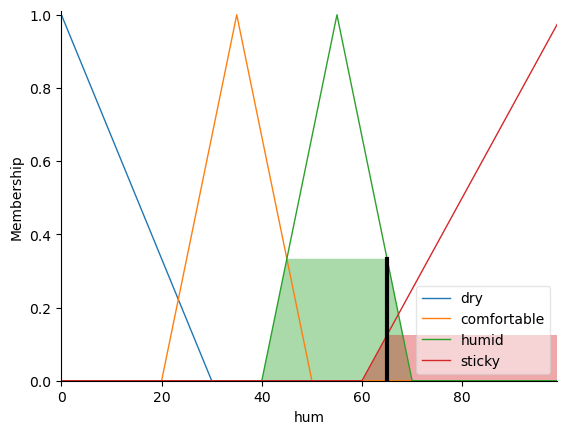

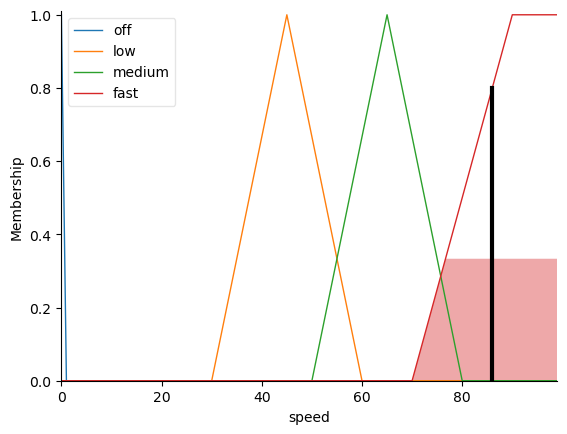

In [10]:
print (output_speed.output)
temp.view(sim=output_speed)
hum.view(sim=output_speed)
speed.view(sim=output_speed)